***ENSEMBLE LEARNING***

The Loan Dataset of a bank is given
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Perform different Ensemble Learning techniques in the given dataset.

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [142]:
data = pd.read_csv('/content/train_loan (1).csv')

In [143]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [144]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [145]:
# statistical description of the dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [146]:
data.shape

(614, 13)

In [147]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [149]:
# checking for missing values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [150]:
# no.of unique values in each features
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [151]:
# we could drop 'Load_ID'
data.drop(['Loan_ID'],axis=1,inplace=True)

In [152]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [153]:
# data type of each feature
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

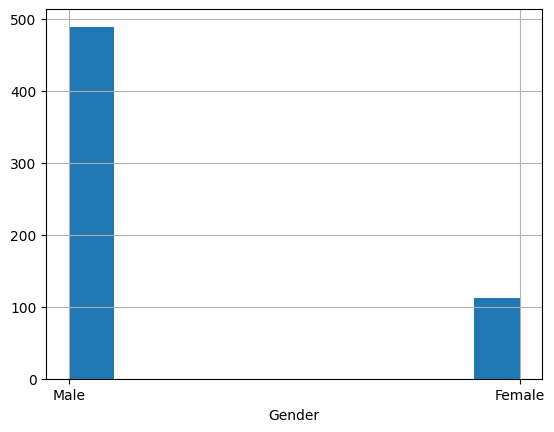

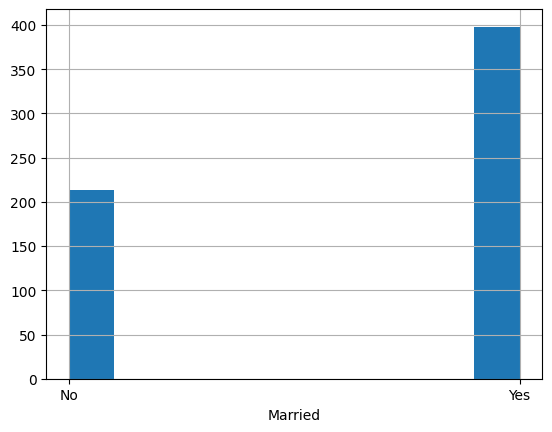

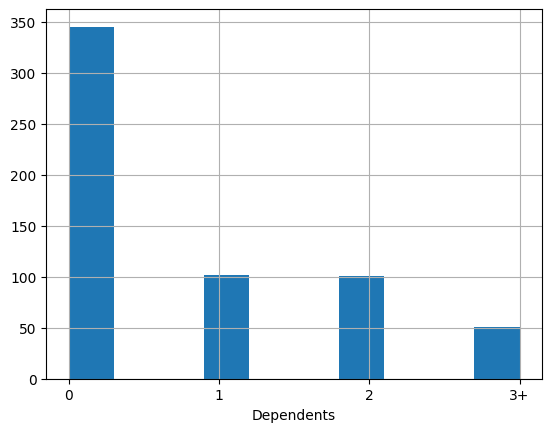

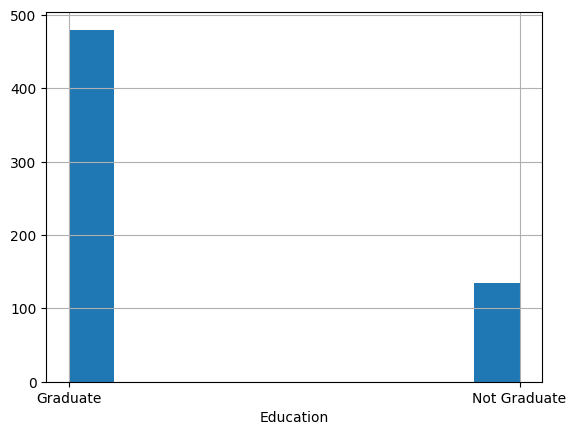

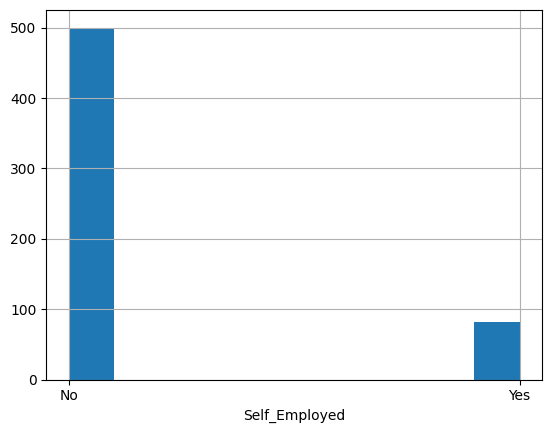

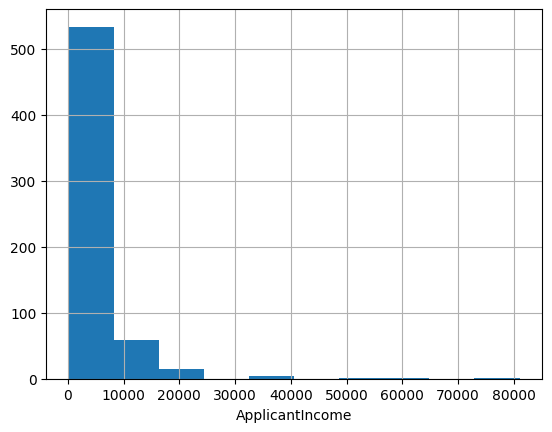

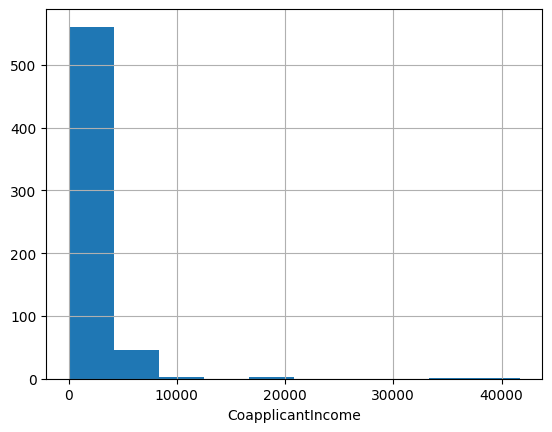

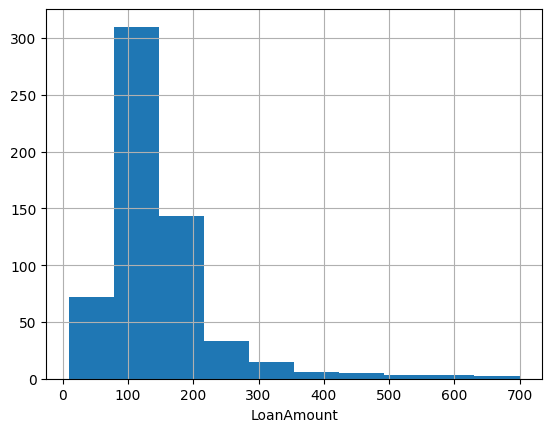

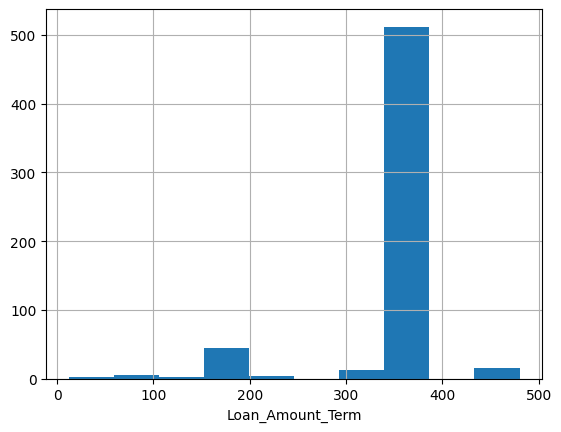

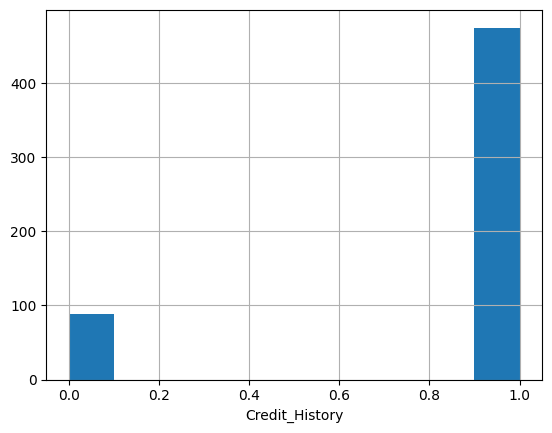

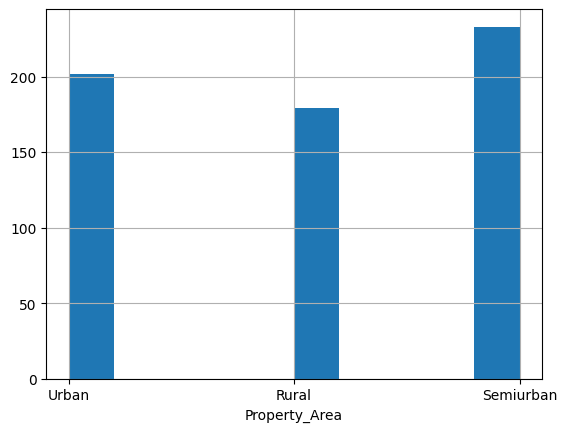

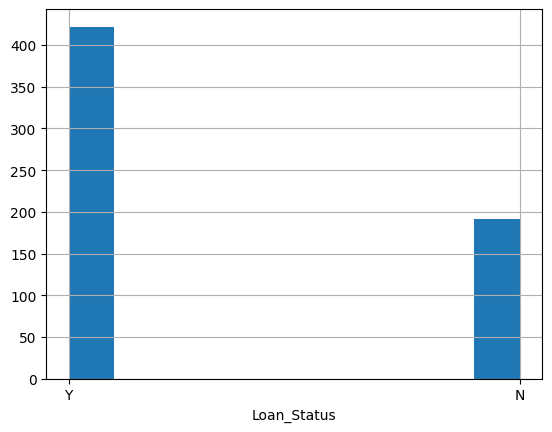

In [154]:
for i in data.columns:
    data[i].hist()
    plt.xlabel(i)
    plt.show()

In [155]:
#handling null values
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])


In [156]:
# checking for missing values after handling
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [157]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [158]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [159]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [160]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [161]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [162]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [163]:
data['Gender']=data['Gender'].map({"Male":0,"Female":1})
data['Married']=data['Married'].map({"No":0,"Yes":1})
data['Education']=data['Education'].map({"Not Graduate":0,"Graduate":1})
data['Self_Employed']=data['Self_Employed'].map({"No":0,"Yes":1})
data['Property_Area']=data['Property_Area'].map({"Urban":0,"Rural":1,"Semiurban":2})

* Here object values are converted to numerical values

In [173]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,Y
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,N
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,Y
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,Y
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,Y


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [175]:
data['Dependents']=data['Dependents'].replace('3+','3')

In [176]:
data['Dependents']=data['Dependents'].astype(int)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


<Axes: >

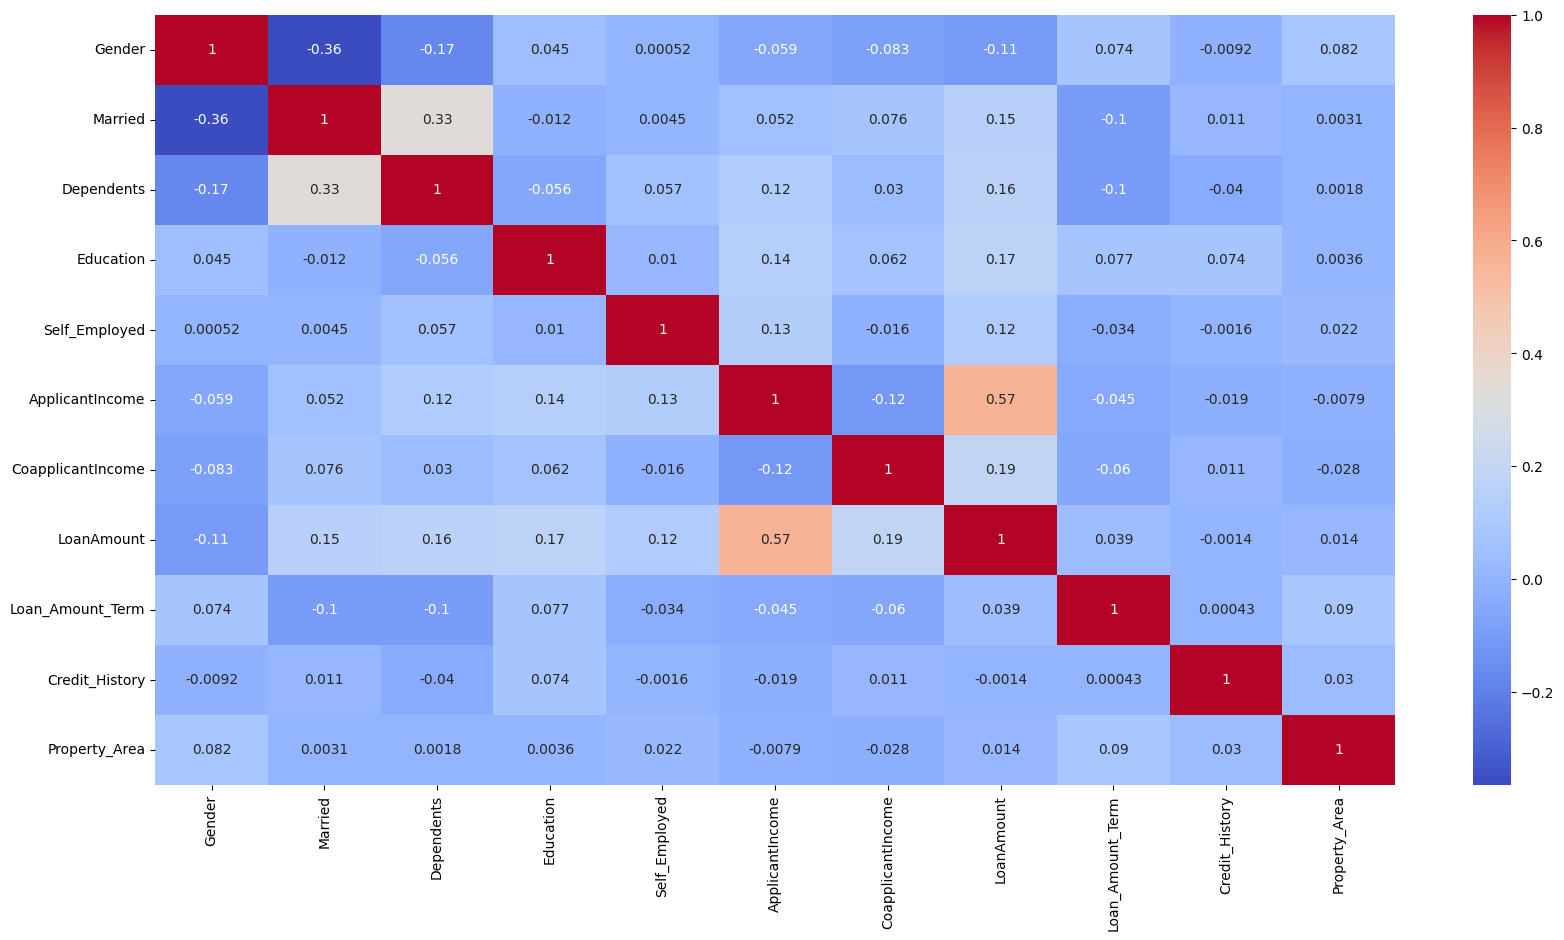

In [178]:
#checking co relation
corr=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [179]:
#splitting data to dependent and independent features
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [180]:
#splitting data to train and test
from sklearn.model_selection import train_test_split

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
#importing accuracy_score
from sklearn.metrics import accuracy_score


* **KNN**

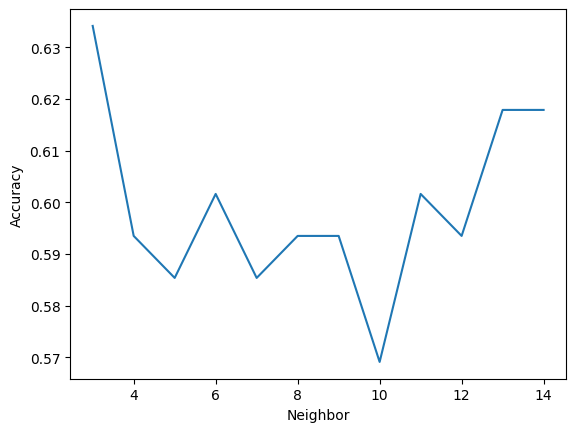

In [204]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metrix=[]
neighbors=np.arange(3,15)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(x_train,y_train)
    y_predict_knn=knn.predict(x_test)
    acc=accuracy_score(y_predict_knn,y_test)
    metrix.append(acc)
plt.plot(neighbors,metrix)
plt.xlabel('Neighbor')
plt.ylabel("Accuracy")
plt.show()

* **RANDOM** **FOREST** **CLASSIFIER**

In [208]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_rf=rf.fit(x_train,y_train)
y_predict_rf=model_rf.predict(x_test)
print("The accuracy score of RandomForestClassifer=",accuracy_score(y_predict_rf,y_test))


The accuracy score of RandomForestClassifer= 0.7642276422764228


In [209]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print("The accuracy score for random forest",accuracy_score(y_pred_rf,y_test))

The accuracy score for random forest 0.7723577235772358


* **DECISION** **TREE** **CLASSIFIER**

In [188]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model_dt=dt.fit(x_train,y_train)
y_predict_dt=model_dt.predict(x_test)
print("The accuracy score of DecisonTreeClassifier=",accuracy_score(y_predict_dt,y_test))

The accuracy score of DecisonTreeClassifier= 0.7154471544715447


* **BAGGING** **CLASSIFIER**

In [189]:
#bagging of decision tree classifier
from sklearn.ensemble import BaggingClassifier
bag_clf_dt=BaggingClassifier(base_estimator=dt,n_estimators=100,random_state=42)
bag_clf_dt.fit(x_train,y_train)
y_pred_bag_clf_dt=bag_clf_dt.predict(x_test)
print("The accuracy score of BaggingClassifier with base estimator as decision tree=",accuracy_score(y_pred_bag_clf_dt,y_test))

The accuracy score of BaggingClassifier with base estimator as decision tree= 0.7804878048780488


In [190]:
#Bagging Classifier with logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
bag_clf_lr=BaggingClassifier(base_estimator=lr,n_estimators=100,random_state=42)
bag_clf_lr.fit(x_train,y_train)
bag_clf_lr_predict=bag_clf_lr.predict(x_test)
print("The accuracy score of BaggingClassifier with base estimator as logistic Regression=",accuracy_score(bag_clf_lr_predict,y_test))


The accuracy score of BaggingClassifier with base estimator as logistic Regression= 0.7886178861788617


In [193]:
knn=KNeighborsClassifier(n_neighbors=k,metric='manhattan')
knn.fit(x_train,y_train)
y_predict_knn=knn.predict(x_test)
print("Accuracy Score of KNN",accuracy_score(y_predict_knn,y_test))

Accuracy Score of KNN 0.6178861788617886


In [194]:
#bagging with knn model
bag_clf_knn=BaggingClassifier(base_estimator=knn,n_estimators=100,random_state=42)
bag_clf_knn.fit(x_train,y_train)
bag_clf_knn_predict=bag_clf_knn.predict(x_test)
print("The accuracy score of BaggingClassifier with base estimator as KNN=",accuracy_score(bag_clf_knn_predict,y_test))

The accuracy score of BaggingClassifier with base estimator as KNN= 0.6260162601626016


In [195]:
#bagging with navie bayes model
from sklearn.naive_bayes import GaussianNB
modelGB=GaussianNB()
bag_clf_GB=BaggingClassifier(base_estimator=modelGB,n_estimators=100,random_state=42)
bag_clf_GB.fit(x_train,y_train)
bag_clf_GB_predict=bag_clf_GB.predict(x_test)
print("The accuracy score of BaggingClassifier with base estimator as GB=",accuracy_score(bag_clf_GB_predict,y_test))

The accuracy score of BaggingClassifier with base estimator as GB= 0.7804878048780488


* **ADABOOST** **CLASSIFIER**

In [210]:
#adaboostClassiier
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(n_estimators=100,random_state=42)
ada_clf.fit(x_train,y_train)
y_pred_ada=ada_clf.predict(x_test)
print("The Accuracy Score for Adaboost",accuracy_score(y_pred_ada,y_test))

The Accuracy Score for Adaboost 0.7642276422764228


In [211]:
ada_clf_rf=AdaBoostClassifier(base_estimator=rf,n_estimators=100,random_state=42)
ada_clf_rf.fit(x_train,y_train)
y_pred_ada_rf=ada_clf_rf.predict(x_test)
print("The Accuracy Score for Adaboost random forest",accuracy_score(y_pred_ada_rf,y_test))

The Accuracy Score for Adaboost random forest 0.7723577235772358


* **GRADIENT** **BOOST** **CLASSIFIER**

In [212]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier
gradclf=GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)
gradclf.fit(x_train,y_train)
y_pred_grad=gradclf.predict(x_test)
print("The Accuracy Score for Gradient Boosting",accuracy_score(y_pred_grad,y_test))

The Accuracy Score for Gradient Boosting 0.7642276422764228


* Performed different Ensemble Learning techniques in the given dataset.

* INFERENCE : The bagging classifier is giving the best accuracy score